In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# get all file paths in data directory
import os
fps = os.listdir("./data")
fps = [f"./data/{fp}" for fp in fps]


df = pd.concat( 
    map(pd.read_csv, fps), ignore_index=True
)

/var/folders/02/8sm7hf812xn2pq_yy1kvs60m0000gn/T/ipykernel_55536/1341822389.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(
/var/folders/02/8sm7hf812xn2pq_yy1kvs60m0000gn/T/ipykernel_55536/1341822389.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(


In [3]:
# rename index column
df = df.rename(
    columns={"Unnamed: 0": "index"}
)
print(df.columns)

Index(['index', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts'],
      dtype='object')


In [4]:
# add columns to dataframe
df["sweden_mentioned"] = pd.Series(dtype="bool")
df["finland_mentioned"] = pd.Series(dtype="bool")

series = df.iterrows()

sweden_count = 0
finland_count = 0
both_count = 0
for row in series:
    current_text = row[1][12]
    if "sweden" in current_text.lower() and "finland" in current_text.lower():
        both_count += 1

    if "sweden" in current_text.lower():
        sweden_count += 1
        df.at[row[0], "sweden_mentioned"] = True
    else:
        df.at[row[0], "sweden_mentioned"] = False

    if "finland" in current_text.lower():
        finland_count += 1
        df.at[row[0], "finland_mentioned"] = True
        # print(row[0])
    else:
        df.at[row[0], "finland_mentioned"] = False

sweden_count -= both_count
finland_count -= both_count

print(f"number of tweets mentioning sweden: {sweden_count}")
print(f"number of tweets mentioning finland: {finland_count}")
print(f"number of tweets mentioning both: {both_count}")
print(f"total number of tweets: {len(df)}")

number of tweets mentioning sweden: 174
number of tweets mentioning finland: 3997
number of tweets mentioning both: 51
total number of tweets: 871453


In [5]:
sweden_pct = sweden_count / len(df)
finland_pct = finland_count / len(df)
print(f"fraction of tweets mentioning sweden: {sweden_pct}")
print(f"fraction of tweets mentioning finland: {finland_pct}")

print(f"finland is {finland_pct / sweden_pct}x more mentioned than sweden")

fraction of tweets mentioning sweden: 0.000199666533938147
fraction of tweets mentioning finland: 0.004586592736498698
finland is 22.971264367816094x more mentioned than sweden


Text(0.5, 1.0, 'Share of analyzed data by subject')

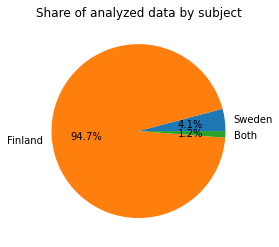

In [6]:
labels = ['Sweden', 'Finland', 'Both']
sizes = [sweden_count, finland_count, both_count]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_facecolor("white")
ax.set_title('Share of analyzed data by subject')


In [7]:
# get a subset of the dataframe to work on instead of the entire dataframe
reduced_df = df[df["text"].str.contains("sweden|finland|Sweden|Finland")]
reduced_df = reduced_df.reset_index()

print(reduced_df["location"])

len(reduced_df)

0              México
1       Mumbai, India
2                🇪🇨🇺🇸
3                 NaN
4          Singapore 
            ...      
4206     Gurun, Kedah
4207              NaN
4208           Madrid
4209              NaN
4210              NaN
Name: location, Length: 4211, dtype: object


4211

In [8]:
locations = reduced_df["location"].dropna()
all_locations = list(set(locations))

import json

# with open("all_countries.json", "w") as fp:
#     json.dump(all_locations, fp)

In [9]:
# we want a plot showing the top 5 most frequently tweeting countries
# also make a plot for positive sentiment and negative sentiment, top 5 countries

# clean country data by code in dataframe
with open("location_key.json", "r") as fp:
    key = json.load(fp)

locations = reduced_df["location"]
print(locations)
countries = locations.replace(key)
print(countries)

0              México
1       Mumbai, India
2                🇪🇨🇺🇸
3                 NaN
4          Singapore 
            ...      
4206     Gurun, Kedah
4207              NaN
4208           Madrid
4209              NaN
4210              NaN
Name: location, Length: 4211, dtype: object
0        MX
1        IN
2        AD
3       NaN
4        SG
       ... 
4206       
4207    NaN
4208     CO
4209    NaN
4210    NaN
Name: location, Length: 4211, dtype: object


In [10]:
reduced_df.insert(
    len(reduced_df.columns),
    "country",
    countries
)

print(reduced_df["location"])
print(reduced_df["country"])


# WHY ARE THERE emojis in the country code?
# fix the indices of the dataframe to be in order

0              México
1       Mumbai, India
2                🇪🇨🇺🇸
3                 NaN
4          Singapore 
            ...      
4206     Gurun, Kedah
4207              NaN
4208           Madrid
4209              NaN
4210              NaN
Name: location, Length: 4211, dtype: object
0        MX
1        IN
2        AD
3       NaN
4        SG
       ... 
4206       
4207    NaN
4208     CO
4209    NaN
4210    NaN
Name: country, Length: 4211, dtype: object


In [11]:
sweden_mentions = reduced_df.query("sweden_mentioned == True")
finland_mentions = reduced_df.query("finland_mentioned == True")
print(len(sweden_mentions))
print(len(finland_mentions))

225
4037


In [12]:
# find top 5 discussers of each country
sweden_countries = sweden_mentions["country"].value_counts().iloc[:11]
print(sweden_countries)
print(sweden_countries.to_list())
finland_countries = finland_mentions["country"].value_counts().iloc[:11]
print(finland_countries)
print(finland_countries.to_list())

US    30
      26
UA    16
AE    10
SE     8
RU     6
IN     5
AF     4
AD     4
CA     3
GB     3
Name: country, dtype: int64
[30, 26, 16, 10, 8, 6, 5, 4, 4, 3, 3]
      331
MX    245
IT    207
US    173
FR    148
AD    117
VE     99
IN     75
AE     67
AR     59
BR     55
Name: country, dtype: int64
[331, 245, 207, 173, 148, 117, 99, 75, 67, 59, 55]


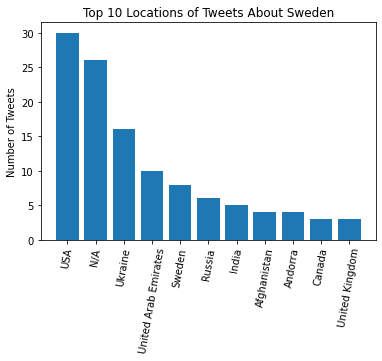

In [13]:
# SWEDEN COUNTRIES
fig, ax = plt.subplots()

words = ["USA", "N/A", "Ukraine", "United Arab Emirates", "Sweden", "Russia", "India", "Afghanistan", "Andorra", "Canada", "United Kingdom"]
counts = sweden_countries.to_list()

ax.bar(words, counts)

ax.set_ylabel('Number of Tweets')
ax.set_title('Top 10 Locations of Tweets About Sweden')
ax.tick_params(axis='x', labelrotation = 80)

plt.show()

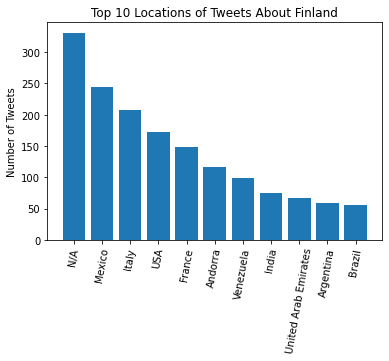

In [14]:
# FINLAND COUNTRIES
fig, ax = plt.subplots()

words = ["N/A", "Mexico", "Italy", "USA", "France", "Andorra", "Venezuela", "India", "United Arab Emirates", "Argentina", "Brazil"]
counts = finland_countries.to_list()

ax.bar(words, counts)

ax.set_ylabel('Number of Tweets')
ax.set_title('Top 10 Locations of Tweets About Finland')
ax.tick_params(axis='x', labelrotation = 80)

plt.show()

In [15]:
# COMPUTE SEPARATELY FOR THE TWO COUNTRIES

sweden_mean_rts = sweden_mentions["retweetcount"].mean()
sweden_median_rts = sweden_mentions["retweetcount"].median()

print(f"sweden mean number of retweets: {sweden_mean_rts}")
print(f"sweden median number of retweets: {sweden_median_rts}")

sweden_mean_favs = sweden_mentions["favorite_count"].mean()
sweden_median_favs = sweden_mentions["favorite_count"].median()

print(f"sweden mean number of favorites: {sweden_mean_favs}")
print(f"sweden median number of favorites: {sweden_median_favs}")

print("\n\n")

finland_mean_rts = finland_mentions["retweetcount"].mean()
finland_median_rts = finland_mentions["retweetcount"].median()

print(f"finland mean number of retweets: {finland_mean_rts}")
print(f"finland median number of retweets: {finland_median_rts}")

finland_mean_favs = finland_mentions["favorite_count"].mean()
finland_median_favs = finland_mentions["favorite_count"].median()

print(f"finland mean number of favorites: {finland_mean_favs}")
print(f"finland median number of favorites: {finland_median_favs}")

sweden mean number of retweets: 7.626666666666667
sweden median number of retweets: 1.0
sweden mean number of favorites: 1.7777777777777777
sweden median number of favorites: 0.0



finland mean number of retweets: 106.96928412187268
finland median number of retweets: 40.0
finland mean number of favorites: 1.1384691602675254
finland median number of favorites: 0.0


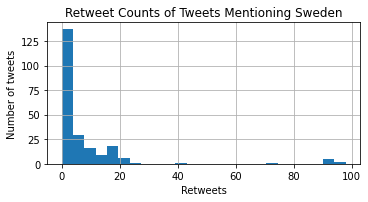

In [16]:
# SWEDEN RETWEETS

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(list(sweden_mentions["retweetcount"]), 25, facecolor='C0')

ax.set_xlabel('Retweets')
ax.set_ylabel('Number of tweets')
ax.set_title('Retweet Counts of Tweets Mentioning Sweden')
ax.grid(True)

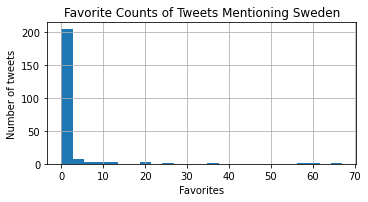

In [17]:
# SWEDEN FAVORITES

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(list(sweden_mentions["favorite_count"]), 25, facecolor='C0')

ax.set_xlabel('Favorites')
ax.set_ylabel('Number of tweets')
ax.set_title('Favorite Counts of Tweets Mentioning Sweden')
ax.grid(True)

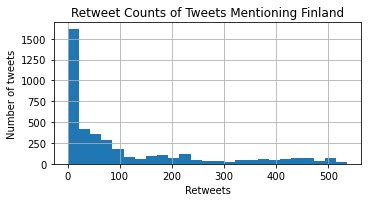

In [18]:
# FINLAND RETWEETS

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(list(finland_mentions["retweetcount"]), 25, facecolor='C0')

ax.set_xlabel('Retweets')
ax.set_ylabel('Number of tweets')
ax.set_title('Retweet Counts of Tweets Mentioning Finland')
ax.grid(True)

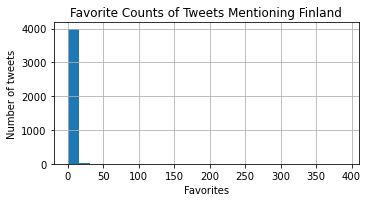

In [19]:
# FINLAND FAVORITES

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(list(finland_mentions["favorite_count"]), 25, facecolor='C0')

ax.set_xlabel('Favorites')
ax.set_ylabel('Number of tweets')
ax.set_title('Favorite Counts of Tweets Mentioning Finland')
ax.grid(True)

In [20]:
# create corpuses of tweet text for sweden and finland
sweden_corpus = []
finland_corpus = []

# create a text file for all tweet text mentioning each country
# process in separate notebook with different environment
sweden_text = sweden_mentions["text"].to_list()
finland_text = finland_mentions["text"].to_list()

with open("sweden_tweets.json", "w") as fp:
    json.dump(sweden_text, fp)

with open("finland_tweets.json", "w") as fp:
    json.dump(finland_text, fp)